In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rawpy 
import os
from pathlib import Path

/home/laura/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Read raw images file
Using rawpy library to read the pixel values. [Documentation](https://letmaik.github.io/rawpy/api/rawpy.RawPy.html)

The camera should be 4000 * 6000 pixels but the raw image only has 3464*5202

In [29]:
# use rawpy library to read the pixel intensity values of the raw image

pardir = Path.cwd().parent
file = os.path.join(pardir, "experiment-images/camera-1/IMG_1807.CR2")

raw = rawpy.imread(file) 
black_level = raw.black_level_per_channel # black level offset 
raw_image = raw.raw_image_visible.astype(np.float32) # raw pixel intensity value
raw_image = raw_image - black_level[0] # apply black level correction
raw_image = np.clip(raw_image, 0, None) # avoid negavative values
raw_image_norm = raw_image / np.max(raw_image)


In [ ]:
# crop picture by taking bounds of non-black pixels, set a threshold for non-black on the normalized pixel values
# use binary_opening to remove single bright pixels in the background
def crop_image(raw_image, threshold= 0.1):
    raw_image_norm = raw_image / np.max(raw_image)
    
    non_black_pixels = np.argwhere(raw_image_norm > threshold)
    y_min, x_min = np.min(non_black_pixels, axis = 0)
    y_max, x_max = np.max(non_black_pixels, axis = 0)
    cropped_image = raw_image[y_min:y_max+1, x_min:x_max+1]
    return cropped_image

In [44]:
# Plot image in black and white
def display_image(raw_image):
    raw_image_norm = raw_image / np.max(raw_image)
    plt.imshow(raw_image_norm, cmap='gray')
    plt.axis("off")
    plt.tight_layout()
    plt.show()

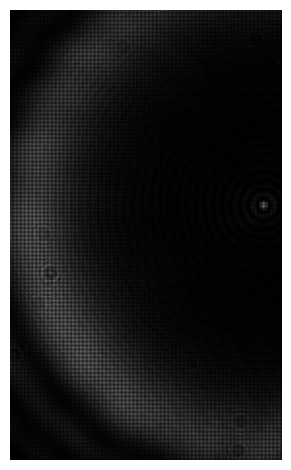

In [51]:
cropped_image = crop_image(raw_image, 0.5)
display_image(cropped_image)